## Лабораторная работа №1
#### *Прудникова Анастасия М8О-408Б-20*
*Вариант 24*

*Целью работы* является исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов.

**Основные этапы работы:**
1. Для первой обучающей выборки построить и обучить сеть, которая будет правильно относить точки к двум классам. Отобразить дискриминантную линию и проверить качество обучения.

2. Изменить обучающее множество так, чтобы классы стали линейно неразделимыми. Проверить возможности обучения по правилу Розенблатта.

3. Для второй обучающей выборки построить и обучить сеть, которая будет правильно относить точки к четырем классам. Отобразить дискриминантную линию и проверить качество обучения.


In [99]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Однослойный персептрон


In [100]:
x1 = [-3.2, 2.9, 2.6, -2.3, 1.7, -0.5]
y1 = [-2.4, -0.2, -1.1, -4.7, -0.8, 1]
c1 = [1, 0, 0, 1, 0, 1]
x_train = torch.FloatTensor(np.array(list(zip(x1, y1))))
y_train = torch.FloatTensor(np.array(c1))

Код ниже представляет базовую реализацию персептрона и готовит основные компоненты для обучения модели при помощи оптимизации и функции потерь. Здесь определён класс Perceptron, который является наследником класса nn.Module из библиотеки PyTorch. Этот класс представляет собой простой персептрон — одну из базовых моделей искусственных нейронных сетей.

In [101]:
class Perceptron(nn.Module):
    def __init__(self, in_features: int, out_features: int, bias: bool = True):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(in_features, out_features))
        self.has_bias = bias
        if bias:
            self.bias_term = nn.Parameter(torch.randn(out_features))
    
    def forward(self, x):
        x = torch.matmul(x, self.weights)
        if self.has_bias:
            x += self.bias_term
        return x

Однослойная модель персептрона будет принимать входные данные, состоящие из двух признаков - координаты `(x, y)`, и иметь один выходной нейрон. Для вычисления потерь используется функция `nn.L1Loss()`. Она вычисляет среднее абсолютное отклонение (MAE) между прогнозами модели и фактическими значениями. Оптимизатор SGD (стохастический градиентный спуск) принимает в качестве параметров веса модели `mlp.parameters()` и задаёт коэффициент скорости обучения `lr`, который определяет величину обновления весов на каждом шаге градиентного спуска.

In [102]:
mlp = Perceptron(2, 1)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(mlp.parameters(), lr=0.05)

Обучим полученную модель

In [103]:
def train(model, x_train, y_train, criterion, optimizer, epochs):
    losses = []
    with tqdm(total=epochs) as pbar:
        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = model(x_train)
            probabilities = torch.sigmoid(outputs.view(-1))
            loss = criterion(probabilities, y_train)
            loss.backward()
            losses.append(loss.detach().item())
            optimizer.step()
            pbar.update(1)
    return losses

training_losses = train(mlp, x_train, y_train, criterion, optimizer, 1000)

100%|██████████| 1000/1000 [00:00<00:00, 1124.74it/s]


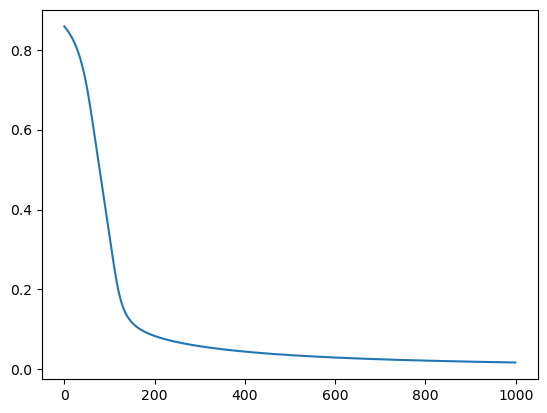

In [104]:
plt.plot(training_losses)
plt.show()

In [105]:
current_weights = mlp.weights.detach().clone()
weights = current_weights.flatten().numpy()

current_bias = mlp.bias_term.detach().clone()
bias = current_bias.flatten().numpy()

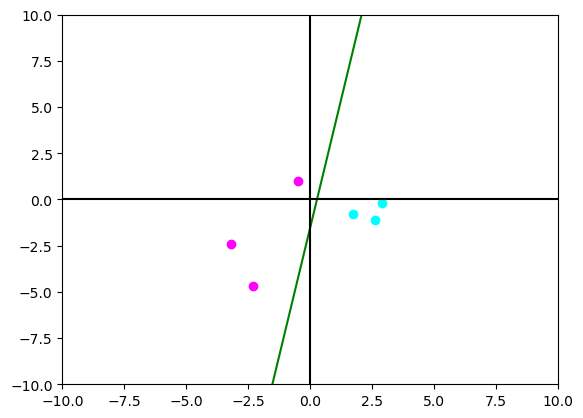

In [106]:
plt.ylim(-10,10)
plt.xlim(-10,10)

def discriminant(x):
    return (-x * weights[0] - bias[0]) / weights[1]

plt.plot(X, discriminant(X), color="green")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
for x, y, c in list(zip(x1, y1, y_train)):
    if c != 1:
        plt.scatter(x, y, color="cyan")
    else:
        plt.scatter(x, y, color="magenta")
plt.show()

 После завершения обучения модели значения весов и смещения сохраняются, и строится разделяющая гиперплоскость, используя значения весов и смещения.
 
 На графике показано разделение двух классов с помощью однослойного персептрона.

### Двуслойный персептрон

In [150]:
x2 = [-1.6, 0.8, -4.6, -2.6, 1.8, 2.3, 1.8, -0.6]
y2 = [-3.6, -2.4, 2.5, -0.6, -1.5, -1.1, 2, -4.9]
c2_1 = [1, 1, 0, 0, 1, 1, 0, 1]
c2_2 = [1, 0, 1, 1, 0, 0, 0, 1]
x_train2 = torch.FloatTensor(np.array(list(zip(x2, y2))))
y_train2 = torch.FloatTensor(np.array(list(zip(c2_1, c2_2))))

Здесь повторяется процесс для случая четырёх классов: создаётся экземпляр модели персептрона perceptron2 с размерностью входных данных 2 и размерностью выходных данных 2.

In [151]:
mlp2 = Perceptron(2, 2)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(mlp2.parameters(), lr=0.05)

In [152]:
def train2(model, x_train, y_train, criterion, optimizer, epochs):
    losses = []
    with tqdm(total=epochs) as pbar_outer:
        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = model(x_train)
            probabilities = torch.sigmoid(outputs)
            loss1 = criterion(probabilities[:, 0], y_train[:, 0])
            loss2 = criterion(probabilities[:, 1], y_train[:, 1])
            loss = loss1 + loss2
            loss.backward()
            losses.append(loss.detach().item())
            optimizer.step()
            pbar_outer.update(1)
    return losses

training_losses2 = train2(mlp2, x_train2, y_train2, criterion, optimizer, 1000)

100%|██████████| 1000/1000 [00:01<00:00, 783.44it/s]


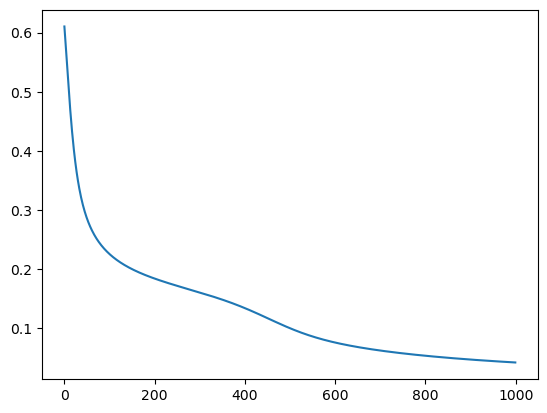

In [153]:
plt.plot(training_losses2)
plt.show()

In [154]:
current_weights2 = mlp2.weights.detach().clone()
weights2 = current_weights2.numpy()

current_bias2 = mlp2.bias_term.detach().clone()
bias2 = current_bias2.numpy()

In [155]:
def decode_categories(arr):
    arr_new = []
    for y in arr:
        if y[0] == 0 and y[1] == 0:
            arr_new.append(0)
        elif y[0] == 0 and y[1] == 1:
            arr_new.append(1)
        elif y[0] == 1 and y[1] == 0:
            arr_new.append(2)
        elif y[0] == 1 and y[1] == 1:
            arr_new.append(3)
    return np.array(arr_new)

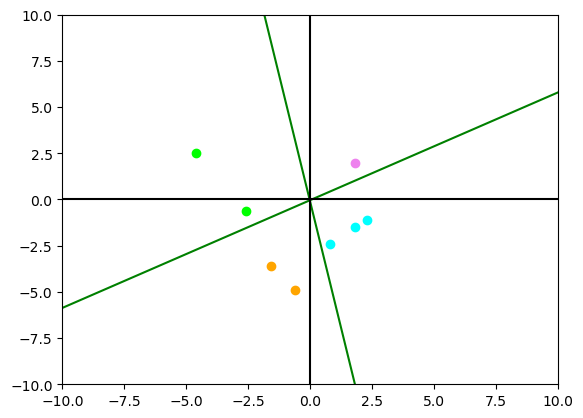

In [156]:
plt.ylim(-10,10)
plt.xlim(-10,10)

def discriminant1(x):
    return (-x * weights2[0][0] - bias2[0]) / weights2[1][0]

def discriminant2(x):
    return (-x * weights2[0][1] - bias2[0]) / weights2[1][1]

plt.plot(X, discriminant1(X), "green")
plt.plot(X, discriminant2(X), "green")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

y_train2 = decode_categories(y_train2.numpy())
for x, y, c in list(zip(x2, y2, y_train2)):
    if c == 0:
        plt.scatter(x, y, color="violet")
    elif c == 1:
        plt.scatter(x, y, color="lime")
    elif c == 2:
        plt.scatter(x, y, color="cyan")
    elif c == 3:
        plt.scatter(x, y, color="orange")

plt.show()

На графике изображено разделение четырёх классов двуслойным персептроном.

### Вывод
В результате выполнения работы было продемонстрировано использование персептрона для решения задач классификации, создание и обучение модели, а также визуализация данных и разделяющих гиперплоскостей. В процессе модификации кода использовались различные методы и преобразования данных, включая изменение функций потерь, обновление весов и смещений модели и декодирование категориальных данных.